The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales

# Data Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("BigData.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


# Exploring data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.shape

(8523, 12)

In [7]:
df.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [8]:
#Two columns Item_Weight and Outlet_Size has null values
#we have total 8523 rows
#in most of the columns diffrence between mean and median is minimum which shows less skewness
#Item_Fat_Content has 5 unique values, Item_Type has 16 ,Outlet_Identifier 10,Outlet_Size and Outlet_Size 3, Outlet_Type has 4.


#We need to remove coulmns which may not effect the predictions and analysis

In [9]:
df.drop(labels=["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"]  , axis=1,inplace=True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


# EDA

In [10]:
#univariant

In [11]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
df["Item_Fat_Content"].replace({"LF": "Low Fat", 
                     "low fat":"Low Fat","reg":"Regular"}, 
                                 inplace = True)

In [13]:
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

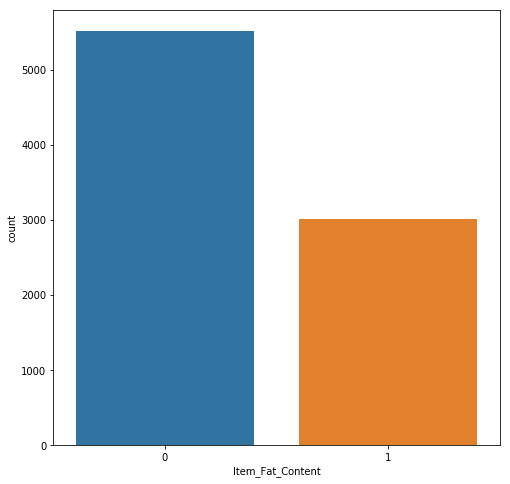

In [14]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Item_Fat_Content"] =le.fit_transform(df["Item_Fat_Content"])
plt.figure(figsize=(8,8))
sns.countplot(df["Item_Fat_Content"])

In [15]:
#fat content is now catagorised into 2 variables Low Fat (5517) and Regular (3006)

In [16]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

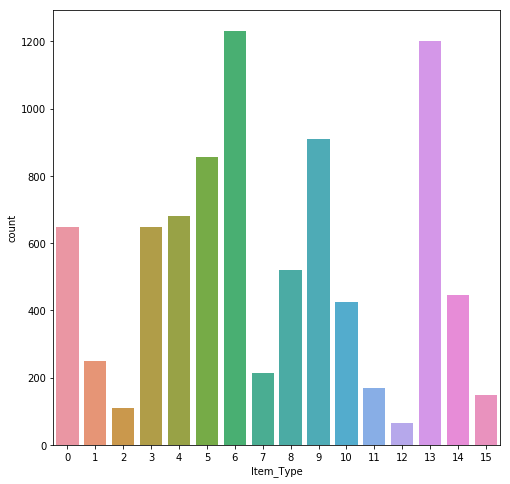

In [17]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Item_Type"] =le.fit_transform(df["Item_Type"])
plt.figure(figsize=(8,8))
sns.countplot(df["Item_Type"])

In [18]:
#item number 6 ie Fruits and Vegetables are most sold items (1232) and item number 12 Seafood  is least (64)

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


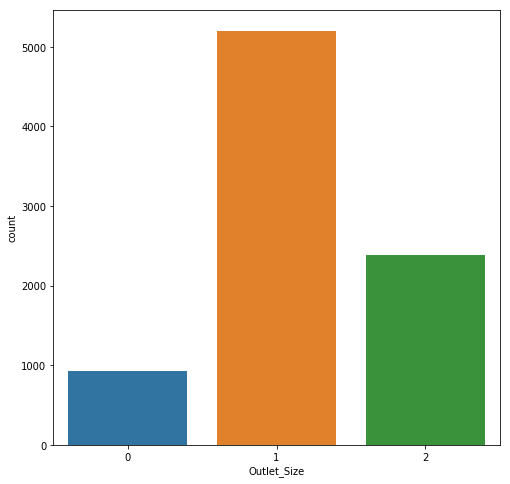

In [19]:
print(df["Outlet_Size"].value_counts())
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="most_frequent")
df['Outlet_Size']=si.fit_transform(df['Outlet_Size'].values.reshape(-1,1))
print(df['Outlet_Size'].value_counts())
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Outlet_Size"] =le.fit_transform(df["Outlet_Size"].astype(str))
plt.figure(figsize=(8,8))
sns.countplot(df["Outlet_Size"])

#there are Medium(5203-orange) ,Small (2388-green),High (932-blue) outlet sizes 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


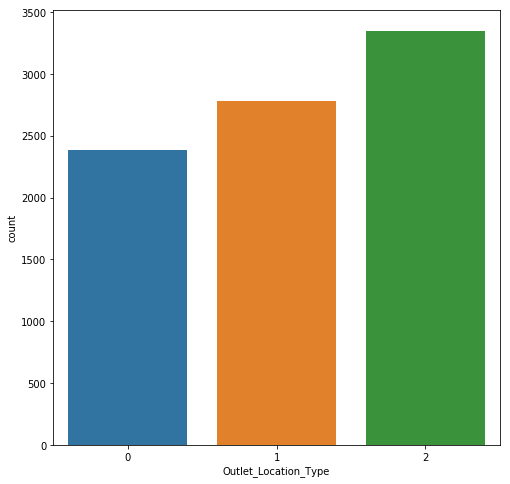

In [20]:
#Outlet_Location_Type
print(df["Outlet_Location_Type"].value_counts())
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Outlet_Location_Type"] =le.fit_transform(df["Outlet_Location_Type"].astype(str))
plt.figure(figsize=(8,8))
sns.countplot(df["Outlet_Location_Type"])

In [21]:
#Tier 1(blue) loaction type is least with 2388 loactions and Tier 3( green) is most with  3350

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64
percentage_of_Supermarket Type1: 65.43470608940514


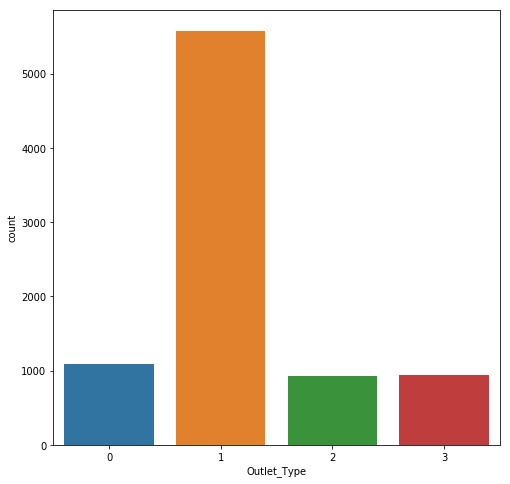

In [22]:
#Outlet_Type
print(df["Outlet_Type"].value_counts())
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Outlet_Type"] =le.fit_transform(df["Outlet_Type"].astype(str))
plt.figure(figsize=(8,8))
sns.countplot(df["Outlet_Type"])
percentage_of_Supermarket_Type1= (5577/8523)*100
print("percentage_of_Supermarket Type1:", percentage_of_Supermarket_Type1)

In [23]:
#most of the outlet type is suppermarket type1(orange) 65% remaining rest 35% is remaing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B7B40F0>,
      dtype=object)

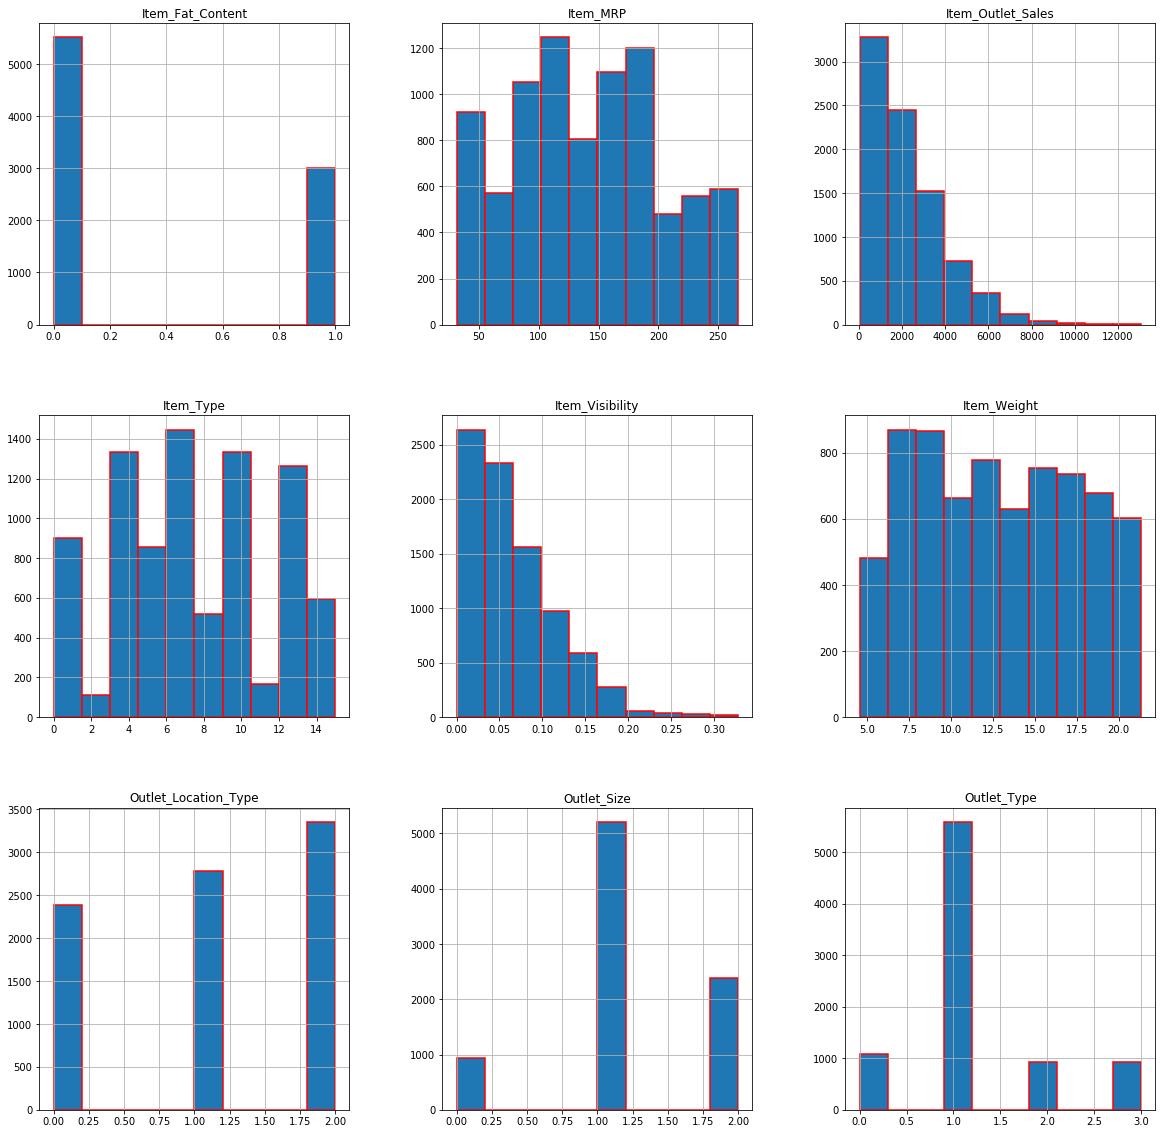

In [24]:
df.hist(edgecolor="red",linewidth=1.5,figsize=(20,20))

In [25]:
list1=["Item_Weight","Item_Visibility","Item_MRP"]
for i in list1:
     print(df[i].describe())

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


In [26]:
#average item weight is 12.85 with minimum weight 4.55 and maximum 21.35
#average Item_Visibility is 0.066132 with minimum Visibility 0 and maximum 0.328391
#average Item_MRP is 140.992782 with minimum price 31.290000 and maximum 266.888400

In [27]:
#Bi -variant

In [28]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,0,2,1,994.7052


0.01412273928005647


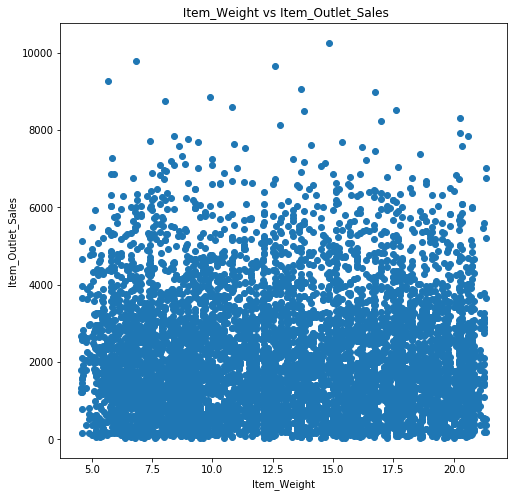

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(x="Item_Weight",y="Item_Outlet_Sales", data=df)
plt.title(" Item_Weight vs Item_Outlet_Sales")
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
print(df["Item_Weight"].corr(df["Item_Outlet_Sales"]))
plt.show()

In [30]:
#thier is no much relation b/w Item_Weight vs Item_Outlet_Sales corelation also shows value.014 which is very less

0.5675744466569195


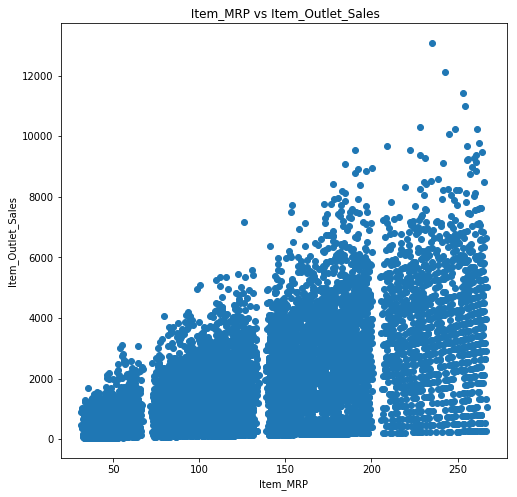

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(x="Item_MRP",y="Item_Outlet_Sales", data=df)
plt.title(" Item_MRP vs Item_Outlet_Sales")
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
print(df["Item_MRP"].corr(df["Item_Outlet_Sales"]))
plt.show()

In [32]:
#as mrp increases sales also inceases

-0.0861821954424413


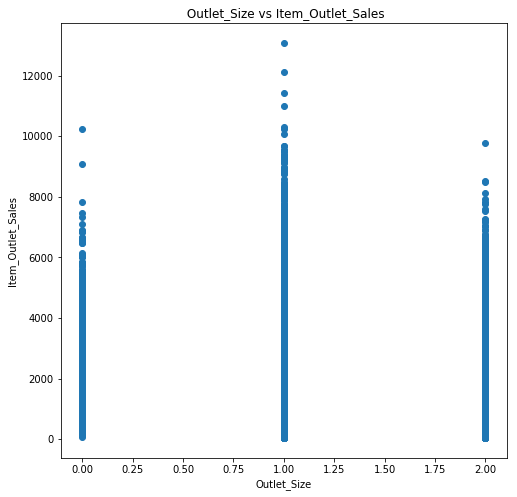

In [33]:

plt.figure(figsize=(8,8))
plt.scatter(x="Outlet_Size",y="Item_Outlet_Sales", data=df)
plt.title(" Outlet_Size vs Item_Outlet_Sales")
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
print(df["Outlet_Size"].corr(df["Item_Outlet_Sales"]))
plt.show()

Text(0.5, 0, 'Item_Outlet_Sales')

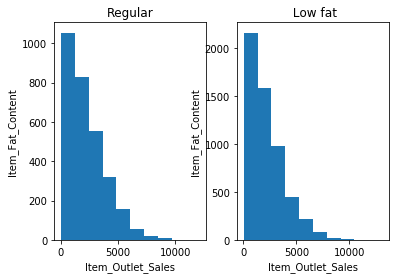

In [34]:
plt.subplot(1, 2, 1)
plt.hist(df[df.Item_Fat_Content == 1]["Item_Outlet_Sales"])
plt.title("Regular")
plt.ylabel("Item_Fat_Content")
plt.xlabel("Item_Outlet_Sales")
plt.subplot(1, 2, 2)
plt.hist(df[df.Item_Fat_Content == 0]["Item_Outlet_Sales"])
plt.title(" Low fat")
plt.ylabel("Item_Fat_Content")
plt.xlabel("Item_Outlet_Sales")

In [35]:
#sales is not much dependent on fat content

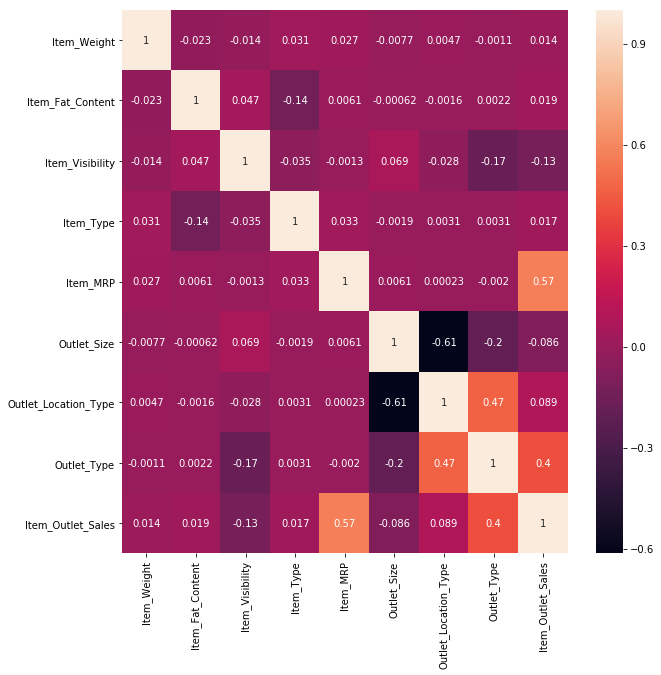

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [37]:
#sales is least dependent on item weight we need to remove it in later stage

# Data cleaning and transformation

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
Item_Weight             7060 non-null float64
Item_Fat_Content        8523 non-null int32
Item_Visibility         8523 non-null float64
Item_Type               8523 non-null int32
Item_MRP                8523 non-null float64
Outlet_Size             8523 non-null int32
Outlet_Location_Type    8523 non-null int32
Outlet_Type             8523 non-null int32
Item_Outlet_Sales       8523 non-null float64
dtypes: float64(4), int32(5)
memory usage: 432.9 KB


In [39]:
#science the correlation b/w Item_Weight and Item_Outlet_Sales is negligible and it also han NAn values we can drop that column

In [40]:
df.drop(labels=["Item_Weight" ], axis=1,inplace=True)

In [41]:
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
print(sl.fit(df))

StandardScaler(copy=True, with_mean=True, with_std=True)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


Item_Fat_Content           AxesSubplot(0.125,0.657941;0.168478x0.222059)
Item_Visibility         AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Item_Type               AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Item_MRP                AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Outlet_Size                AxesSubplot(0.125,0.391471;0.168478x0.222059)
Outlet_Location_Type    AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Outlet_Type             AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Item_Outlet_Sales       AxesSubplot(0.731522,0.391471;0.168478x0.222059)
dtype: object

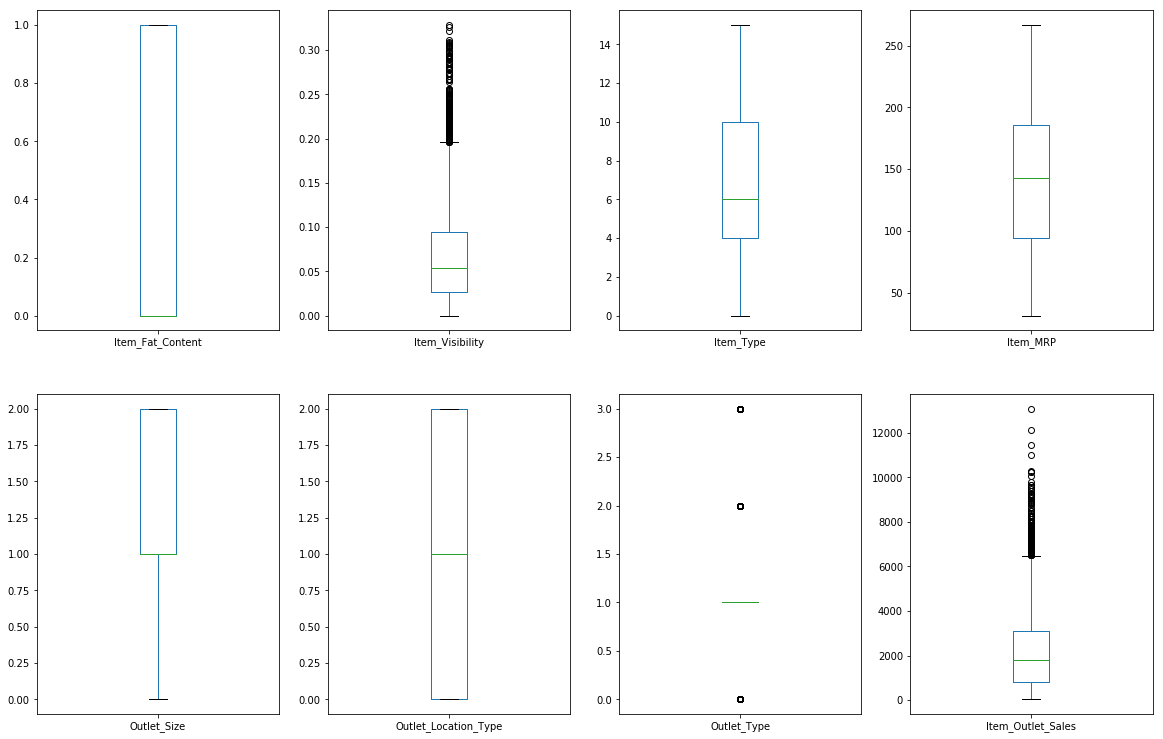

In [42]:
df.plot(kind="box", subplots=True, layout=(3,4),figsize=(20,20))

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.73814723, 0.97073217, 0.76647929, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.35474328, 0.90811123, 1.6089627 , ..., 1.09156913, 1.00297245,
        1.01844035],
       [0.73814723, 0.95691733, 0.6587859 , ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [0.73814723, 0.59978449, 0.1836975 , ..., 0.13888236, 0.25265831,
        0.57909963],
       [1.35474328, 1.53287976, 1.3714185 , ..., 1.09156913, 1.00297245,
        0.19672492],
       [0.73814723, 0.41193591, 1.6089627 , ..., 1.36933384, 0.25265831,
        0.82959407]])

In [44]:
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
percentage_ofouliers=((8535-8338)/8535)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

(8338, 8)
using z score percentage of outlier removed: 2.308142940831869


In [45]:
#lets check with IQR method
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Item_Fat_Content           1.000000
Item_Visibility            0.067596
Item_Type                  6.000000
Item_MRP                  91.817200
Outlet_Size                1.000000
Outlet_Location_Type       2.000000
Outlet_Type                0.000000
Item_Outlet_Sales       2267.049000
dtype: float64


In [46]:
df_new1=df[~((df<(Q1-1.5 *IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)
percentage_ofouliers=((8535-5497)/8535)*100

print("using IQR percentage of outlier removed:",percentage_ofouliers)

(5497, 8)
using IQR percentage of outlier removed: 35.59461042765085


In [47]:
df_new.skew()

Item_Fat_Content        0.620973
Item_Visibility         0.794272
Item_Type               0.098295
Item_MRP                0.138990
Outlet_Size            -0.087933
Outlet_Location_Type   -0.202674
Outlet_Type             0.956727
Item_Outlet_Sales       0.878267
dtype: float64

In [48]:
x=df_new.drop(labels="Item_Outlet_Sales",axis=1)
y=df_new["Item_Outlet_Sales"]

In [49]:
x.skew()

Item_Fat_Content        0.620973
Item_Visibility         0.794272
Item_Type               0.098295
Item_MRP                0.138990
Outlet_Size            -0.087933
Outlet_Location_Type   -0.202674
Outlet_Type             0.956727
dtype: float64

In [50]:
x.columns

Index(['Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [51]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method=("yeo-johnson"))
x=pd.DataFrame(x,columns=['Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
x.skew()

Item_Fat_Content        0.620973
Item_Visibility         0.115911
Item_Type              -0.165742
Item_MRP               -0.112576
Outlet_Size            -0.043996
Outlet_Location_Type   -0.216731
Outlet_Type             0.010691
dtype: float64

In [52]:
#removed skewness, ouliers,and scaled for same magnitude
#now data is cleaned and ready for model fitting

# Model fitting

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.39,random_state=60)

In [55]:
x_train.shape

(5086, 7)

In [56]:
y_train.shape

(5086,)

In [57]:
x_test.shape

(3252, 7)

In [58]:
y_test.shape

(3252,)

In [59]:
#linear regression

In [126]:
lm=LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

In [ ]:
lm.coef_
lm.intercept_
lm.score(x_train,y_train)

In [ ]:
pred=lm.predict(x_test)
print("predicted result price:", pred)
print("actual price:", y_test)

In [60]:
#SVR

In [69]:
from sklearn.svm import SVR
klist=["poly", 'linear',"rbf"]
for i in klist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train, y_train))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.13772904126916619
0.4561184971442977


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.057969211486603056


         Actual      Predict   Difference
8182  1225.0720  1926.977248  -701.905248
2597  1186.4556  1689.837784  -503.382184
3012   852.2240  1689.655641  -837.431641
6420  6056.1168  1843.638244  4212.478556
1552  1304.9680  2016.527894  -711.559894
6835  2217.1140  1788.512660   428.601340
1006  2561.9984  1885.524122   676.474278
6130  3115.9440  1875.023825  1240.920175
7944   961.4152  1596.308174  -634.892974
3140   564.5984  1615.191381 -1050.592981
103    667.7974  1625.512067  -957.714667
5292  6723.2484  1864.498740  4858.749660
6208   183.7608  1617.250351 -1433.489551
4522  2011.3818  1676.061677   335.320123
862   2014.7108  1716.027574   298.683226
6468   282.2992  1876.490563 -1594.191363
7889   377.5086  1595.724419 -1218.215819
5776  2516.7240  1715.502227   801.221773
3170   663.1368  1775.103028 -1111.966228
384   3523.4136  1731.567955  1791.845645
2786  2050.6640  2023.550747    27.113253
8332   575.2512  1681.760524 -1106.509324
4439   407.4696  1528.858882 -1121

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


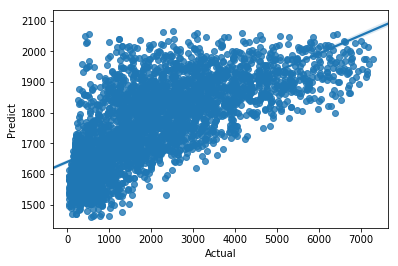

In [70]:
pred=sv.predict(x_test)
result=pd.DataFrame({
    'Actual':y_test,
    'Predict':pred, "Difference":(y_test-pred)})
print(result)
sns.regplot(x='Actual',y='Predict',data=result)

# Model evaluation

In [71]:
print('Errors:')
print("mean absolute error:", mean_absolute_error(y_test, pred))
print("mean squared error:", mean_squared_error(y_test, pred))
print("root mean squared error:", np.sqrt(mean_squared_error(y_test, pred)))

Errors:
mean absolute error: 1186.8814041017142
mean squared error: 2425799.0477910563
root mean squared error: 1557.4976878926839


In [72]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.052771691049445124


In [73]:
#Cross validation

In [74]:
from sklearn.model_selection import cross_val_score
cvscore=cross_val_score(sv,x,y,cv=5)
print(cvscore)
print(cvscore.mean(),cvscore.std() )

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.07757644 0.09573532 0.07595526 0.09068104 0.09543294]
0.08707620004630642 0.008622424057124408


In [80]:
#Ensemble
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
#ls=Lasso(alpha=1.0) default
ls.fit(x_train, y_train)
print(ls.score(x_train, y_train))
print(ls.coef_)

0.5111205566685528
[  38.71153222  -20.80204714    8.13184568  901.08737344 -151.77982964
 -286.63308808  734.97506981]


In [81]:
rd=Ridge(alpha=0.0001)
#ls=Lasso(alpha=1.0) default
rd.fit(x_train, y_train)
print(rd.score(x_train, y_train))
print(rd.coef_)

0.5111205566686006
[  38.7116513   -20.80212145    8.13195851  901.08745854 -151.78008336
 -286.6334019   734.97521668]


In [82]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train, y_train)
print(enr.score(x_train, y_train))
enpred=enr.predict(x_test)
enr.coef_

0.5111205545849192


array([  38.71062617,  -20.80839283,    8.13262458,  901.04048905,
       -151.74948261, -286.57861763,  734.92143284])

In [83]:

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,random_state=45)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,predrf))
print('mean squared error:',mean_squared_error(y_test,predrf))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))
print(r2_score(y_test,predrf))

mean absolute error: 772.1978498172816
mean squared error: 1146427.906743584
root mean squared error: 1070.7137370668147
0.5523417455261591


In [84]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,ad_pred))
print('mean squared error:',mean_squared_error(y_test,ad_pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,ad_pred)))
print(r2_score(y_test,ad_pred))

mean absolute error: 795.1394201847796
mean squared error: 1125764.9153998042
root mean squared error: 1061.0206950855409
0.5604102499499908


In [87]:
import pickle
filename="bigdata.pkl"
pickle.dump(ad,open(filename,"wb"))